<a href="https://colab.research.google.com/github/aysckmk/BLPS254/blob/main/W12AlperenSayar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

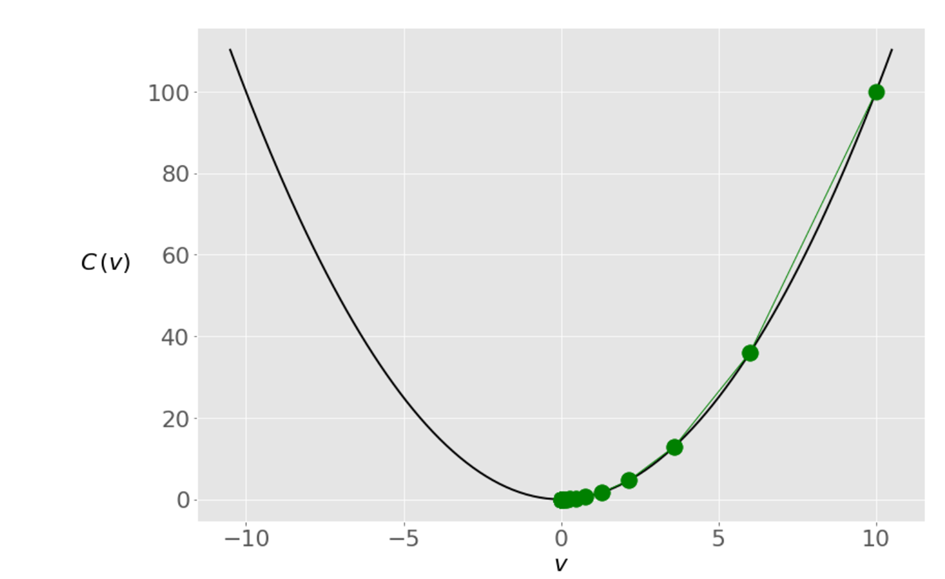

--------------------------------------------------------------------------------

Soru 1) Gradient Descent algortimasını kullanarak x^2+2*x+1 fonksiyonu için gloabil minumum noktasını bulunuz.

--------------------------------------------------------------------------------

Soru 2) Learning rate parametresini 0.001, 0.01,0.0001,0.1 olarak deneyerek sonuçlarını karşılaştırınız.

--------------------------------------------------------------------------------

Not: GD algoritmasını kendiniz yazınız. 

Hint: Fonksiyonun sonuçta bir yerde durması gerekiyor. Bunu kullanmayı unutmayız. Örnek olarak iki değer arasındaki fark şundan küçükse gibi.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def func(x):
  return (x**2)+(2*x)+1

def gradient_func(x):
   return 2*x +2
     

In [3]:
def gradient_descent(x,gradient_func, learn_rate, max_iter, tol=1e-01):
  next_point = tol+1
  points = [x]
  while next_point > tol:
    for i in range(max_iter):
      next_point = learn_rate*gradient_func(x) 
      x -= next_point
      points.append(x)
  return points

In [5]:
learning_rates=[0.001, 0.01,0.0001,0.1]
lins = np.linspace(-10,10,50)
grad = gradient_descent((lins[-1]), gradient_func, learning_rates[-1], 999)
root=list()
for i in grad:root.append(func(i))

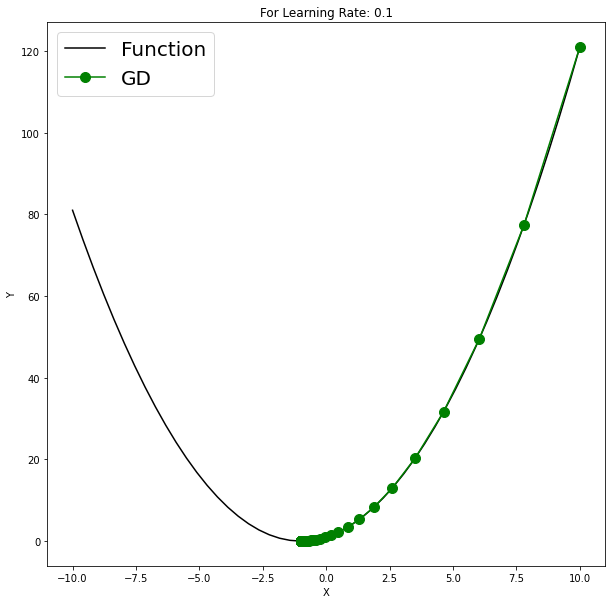

In [6]:
plt.figure(figsize=(10,10))
plt.plot(lins,func(lins), color="black", label="Function")
plt.plot(grad, root, color="green",marker="o",ms = 10, label="GD")
plt.title(f"For Learning Rate: {learning_rates[-1]}")
plt.legend(fontsize=20)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [7]:
gradient = list()
for i in learning_rates:
  gradient.append(gradient_descent((lins[-1]), gradient_func, i, 999)[-1])

gradient = pd.DataFrame(data=gradient,columns=["Global Minimum"])
root = pd.DataFrame(data=learning_rates,columns=["Learning Rates"])
gradient = pd.concat([gradient,root],axis=1)
gradient.set_index("Learning Rates")

,Global Minimum
Learning Rates,
0.0010,0.488687
0.0100,-1.000000
0.0001,8.007660
0.1000,-1.000000
